# City centers

## Reading files

Load the required modules

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

Load a GeoJSON file containing GeoJSON file.

In [2]:
belgium = gpd.read_file('https://gist.githubusercontent.com/jandot/ba7eff2e15a38c6f809ba5e8bd8b6977/raw/eb49ce8dd2604e558e10e15d9a3806f114744e80/belgium_municipalities_topojson.json')

Get info on the dataframe.

In [3]:
belgium.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        0 non-null      object  
 1   OBJECTID  589 non-null    int64   
 2   ADMUNAFR  589 non-null    object  
 3   ADMUNADU  589 non-null    object  
 4   ADMUNAGE  589 non-null    object  
 5   Communes  589 non-null    object  
 6   CODE_INS  589 non-null    object  
 7   arrond    589 non-null    object  
 8   geometry  589 non-null    geometry
dtypes: geometry(1), int64(1), object(7)
memory usage: 41.5+ KB


Set the municipaolities `CODE_INS` as the index for the dataframe.

In [4]:
belgium.set_index('CODE_INS', inplace=True)

Find the entry for Hasselt.

In [5]:
belgium.query('ADMUNADU == "HASSELT"')

,id,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,arrond,geometry
CODE_INS,,,,,,,,
71022,None,470,HASSELT,HASSELT,HASSELT,Hasselt,71,"POLYGON ((5.40125 50.96760, 5.38475 50.95942, ..."


Get the geomerty for Belgium. It is returned as a Shapely object, a `Polygon` in this case.

In [6]:
hasselt_shape = belgium.at['71022', 'geometry']

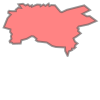

In [7]:
hasselt_shape

## Centroids

Although it is possible to obtain the coordinates of city centers online, this data is not freely available.  We can approximate the location by computing the centroid of the geometric shape associdatted with the municipality.

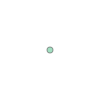

In [8]:
hasselt_shape.centroid

In [9]:
belgium['center'] = belgium.geometry.centroid

In [10]:
belgium

,id,OBJECTID,ADMUNAFR,ADMUNADU,ADMUNAGE,Communes,arrond,geometry,center
CODE_INS,,,,,,,,,
11001,None,1,AARTSELAAR,AARTSELAAR,AARTSELAAR,Aartselaar,11,"POLYGON ((4.40018 51.12269, 4.39645 51.11908, ...",POINT (4.38252 51.13211)
11002,None,2,ANVERS,ANTWERPEN,ANTWERPEN,Antwerpen,11,"POLYGON ((4.36815 51.35613, 4.32623 51.33593, ...",POINT (4.36969 51.26060)
11004,None,3,BOECHOUT,BOECHOUT,BOECHOUT,Boechout,11,"POLYGON ((4.53013 51.19014, 4.53338 51.18498, ...",POINT (4.51660 51.16564)
11005,None,4,BOOM,BOOM,BOOM,Boom,11,"POLYGON ((4.38802 51.08333, 4.38525 51.08068, ...",POINT (4.37273 51.09357)
11007,None,5,BORSBEEK,BORSBEEK,BORSBEEK,Borsbeek,11,"POLYGON ((4.50906 51.18977, 4.50448 51.18409, ...",POINT (4.48759 51.19154)
...,...,...,...,...,...,...,...,...,...
93018,None,585,DOISCHE,DOISCHE,DOISCHE,Doische,93,"POLYGON ((4.74415 50.20920, 4.75390 50.20632, ...",POINT (4.69894 50.14435)
93022,None,586,FLORENNE,FLORENNE,FLORENNE,Florennes,93,"POLYGON ((4.58854 50.32131, 4.59252 50.30539, ...",POINT (4.63151 50.25385)
93056,None,587,PHILIPPEVILLE,PHILIPPEVILLE,PHILIPPEVILLE,Philippeville,93,"POLYGON ((4.54085 50.22563, 4.55434 50.21598, ...",POINT (4.58768 50.16932)


Write the coordinates to a JSON file.

In [11]:
with open('Data/city_centers.json', 'w') as file:
    print(gpd.GeoSeries(belgium.center).to_json(), file=file)

Plot the centers on top of the map of Belgium.

In [12]:
centers = gpd.GeoDataFrame(geometry=belgium.center)

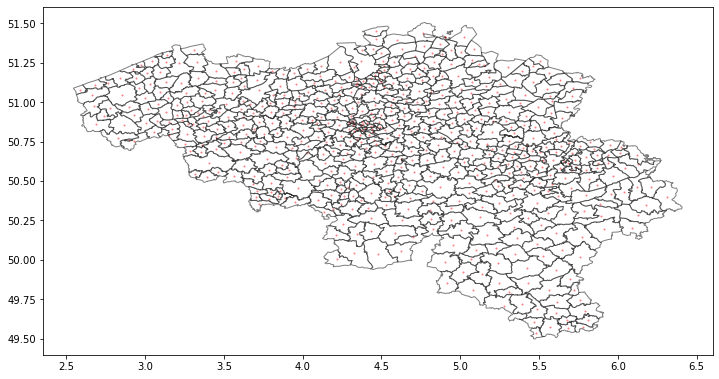

In [13]:
axes = centers.plot(markersize=1, color='red', figsize=(12, 15))
_ = belgium.geometry.plot(ax=axes, color='white', edgecolor='black', alpha=0.5)